In [13]:
import numpy as np 
import pandas as pd 

import os


In [14]:
import keras

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [17]:
from sklearn.metrics import accuracy_score

In [19]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [20]:
import os
import numpy as np
from numpy import *

In [21]:
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('archive (1) 2/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('archive (1) 2/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [23]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [25]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 105s 1s/step - loss: 1.8288 - accuracy: 0.2928 - val_loss: 1.3643 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 110s 1s/step - loss: 1.2112 - accuracy: 0.4453 - val_loss: 1.0894 - val_accuracy: 0.5442
Epoch 3/20
83/83 [==============================] - 114s 1s/step - loss: 0.9782 - accuracy: 0.5709 - val_loss: 1.0027 - val_accuracy: 0.5510
Epoch 4/20
83/83 [==============================] - 113s 1s/step - loss: 0.8411 - accuracy: 0.6356 - val_loss: 0.8841 - val_accuracy: 0.6122
Epoch 5/20
83/83 [==============================] - 108s 1s/step - loss: 0.7520 - accuracy: 0.6814 - val_loss: 0.6905 - val_accuracy: 0.6905
Epoch 6/20
83/83 [==============================] - 105s 1s/step - loss: 0.6440 - accuracy: 0.7212 - val_loss: 0.7225 - val_accuracy: 0.6599
Epoch 7/20
83/83 [==============================] - 106s 1s/step - loss: 0.5891 - accuracy: 0.7575 - val_loss: 0.5970 - val_accuracy: 0.7483
Epoch 8/20
83

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

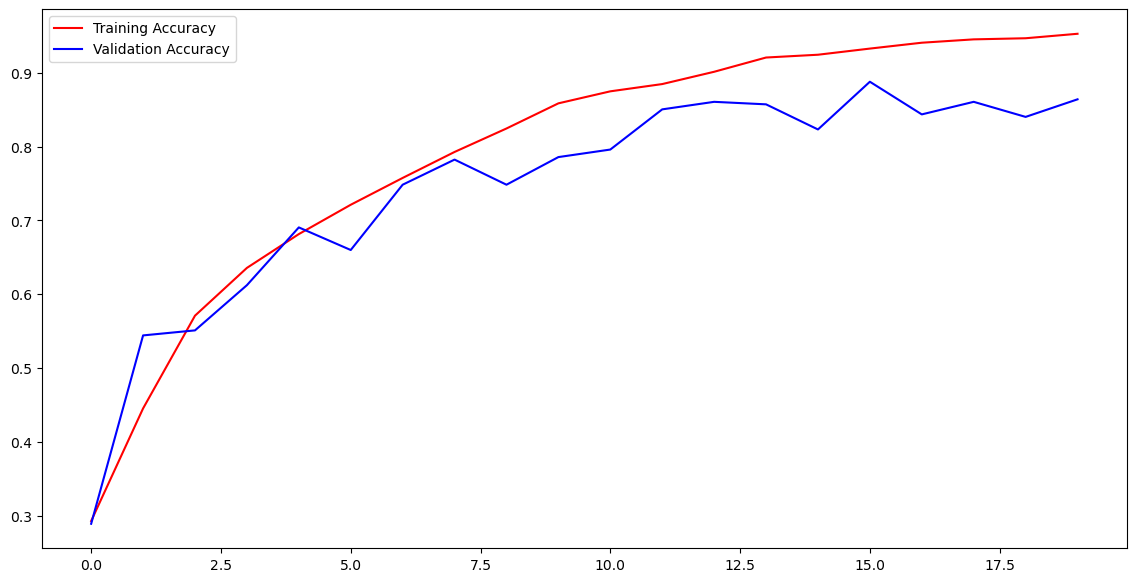

In [32]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

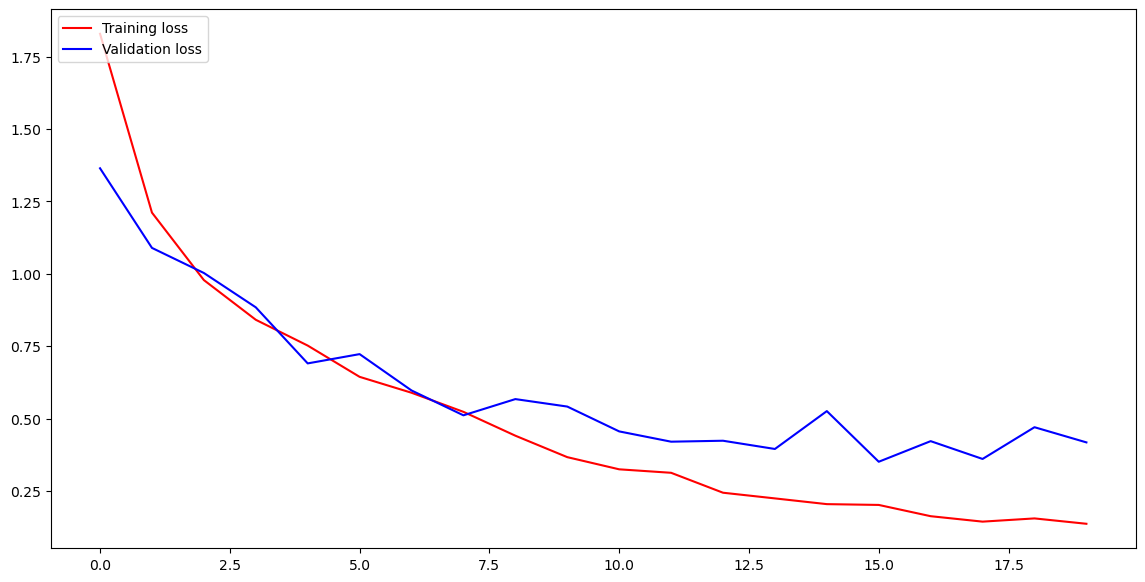

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [35]:
img = cv2.imread('archive (1) 2/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

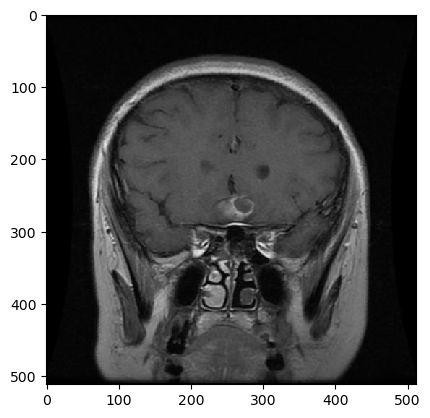

In [38]:
from tensorflow.keras.preprocessing import image
img = image.load_img('archive (1) 2/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [40]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 88ms/step


array([[3.7072837e-06, 1.5821659e-05, 9.2611808e-06, 9.9997115e-01]],
      dtype=float32)